In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

# To plot pretty figures

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGE_DIR = "."

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
    X_train = mnist.data[reorder_train]
    y_train = mnist.target[reorder_train]
    X_test = mnist.data[reorder_test + 60000]
    y_test = mnist.target[reorder_test + 60000]
    
    return X_train,y_train,X_test,y_test

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml(name='mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", IMAGE_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Saving figure some_digit_plot


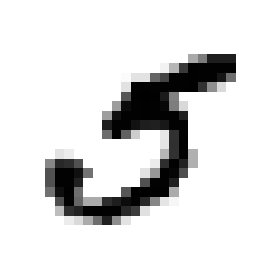

In [5]:
import matplotlib as mpl
some_digit = mnist.data[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [8]:
def train_predict(some_digit,X_train,y_train):
    #import numpy as np
    shuffle_index = np.random.permutation(60000)
    X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
    # Example: Binary number 5 Classifier
    y_train_5 = (y_train == 5)
    y_test_5 = (y_test == 5)

In [9]:
X_train,y_train,X_test,y_test = sort_by_target(mnist)
train_predict(some_digit,X_train,y_train)

In [30]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier
# print prediction result of the given input some_digit
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

#Printing the Prediction result for the digit using SGD Model classifier
print(sgd_clf.predict([some_digit]))

[ True]


In [25]:
sgd_clf.fit(X_test, y_test_5)
print(sgd_clf.predict([some_digit]))

[ True]


In [26]:
#Calculating the Cross Validation Score using training data
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(sgd_clf,X_train,y_train_5, cv=5,scoring="accuracy")
print("Cross Validation Score:",scores_train)

Cross Validation Score: [0.80416667 0.95708333 0.9605     0.95433333 0.93641667]


In [29]:
#Calculating the Cross Validation Score using test data
scores_test = cross_val_score(sgd_clf,X_test,y_test_5, cv=5,scoring="accuracy")
print("Cross Validation Score:",scores_test)

Cross Validation Score: [0.864  0.936  0.9575 0.945  0.925 ]
